## Loading MNIST dataset
The MNIST dataset (a classic in the Machine Learning community) has been around almost as long as the field itself and has been intensively studied. 

It’s a set of 60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s. 


In [1]:
# Loading the MNIST dataset in Keras
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
# Having a look at Training Data
print(train_images.shape)
print(len(train_labels))
print(train_labels)

(60000, 28, 28)
60000
[5 0 4 ... 5 6 8]


In [3]:
# Having a look at Test Data
print(test_images.shape)
print(len(test_labels))
print(test_labels)

(10000, 28, 28)
10000
[7 2 1 ... 4 5 6]


In [4]:
# Exemining one specific image
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

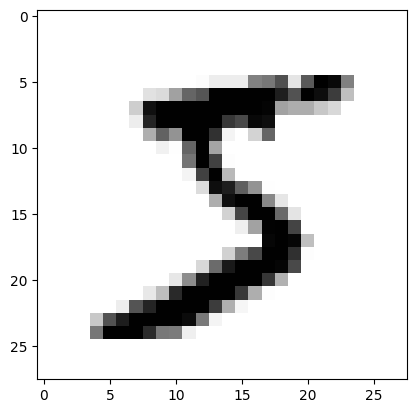

In [5]:
# Displaying the item from the training dataset
import matplotlib.pyplot as plt

digit = train_images[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [6]:
type(train_images[0])

numpy.ndarray

In [7]:
train_images[0].shape

(28, 28)

## Simple densely connected NN

In [8]:
# NN Architecture
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
 layers.Dense(512, activation="relu"),
 layers.Dense(10, activation="softmax")
])

In [9]:
# Compilation step
model.compile(optimizer="rmsprop",
 loss="sparse_categorical_crossentropy",
 metrics=["accuracy"])

In [10]:
# Preparing the image data
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [11]:
# Fitting the model
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 4ms/step - loss: 0.2625 - accuracy: 0.9240
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1046 - accuracy: 0.9685
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0693 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0502 - accuracy: 0.9847
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0378 - accuracy: 0.9888


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Using the model to make predictions
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 66ms/step


array([7.2859955e-08, 1.3443788e-09, 7.8926814e-06, 6.0861545e-05,
       1.0489487e-12, 8.7023345e-08, 9.3435394e-13, 9.9992192e-01,
       4.6996007e-08, 9.1317606e-06], dtype=float32)

In [14]:
predictions[0].argmax() 

7

In [15]:
predictions[0][7] 

0.9999219

In [16]:
test_labels[0] 

7

In [17]:
# Evaluating the model on new (test) data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0599 - accuracy: 0.9823
test_acc: 0.9822999835014343


In [18]:
# To see the weights of a trained model, let's use the get_weights() method:
weights = model.get_weights()

# 'weights' is a list containing weight tensors
for layer_weights in weights:
    print(layer_weights)

[[-0.04862154 -0.01787297 -0.01278308 ...  0.062282    0.02317104
   0.05233382]
 [-0.06365855  0.00677675  0.03951988 ...  0.0314947   0.05200911
   0.0360027 ]
 [-0.03289864 -0.02920125  0.04170632 ... -0.02821276  0.03631988
  -0.0062012 ]
 ...
 [-0.02485764  0.03258973 -0.06292836 ... -0.04105919 -0.00731029
  -0.02920138]
 [ 0.02530164  0.02926534  0.06348133 ... -0.0659215   0.0674682
   0.06073225]
 [ 0.05021491  0.02981909  0.04063243 ...  0.0270023  -0.03977605
   0.0489298 ]]
[-9.34440456e-03 -3.67840379e-02  6.74244389e-02 -1.28318947e-02
 -1.14939297e-02  3.22440714e-02 -3.08896601e-02  8.51458833e-02
  1.09756999e-01  1.08644128e-01  6.67547621e-03 -2.96570212e-02
 -2.73044705e-02  1.96413808e-02 -2.42756940e-02  1.31691098e-02
  1.33226002e-02  2.08701026e-02  2.23330837e-02 -2.68539507e-02
  6.92823250e-03 -9.88644664e-04  3.46632898e-02  5.65266982e-02
 -3.52797508e-02  3.85520887e-03 -1.26063805e-02  2.79741175e-03
  8.76378559e-04 -8.71551782e-03  5.06091341e-02  1.22

In [19]:
len(weights)

4

In [20]:
for layer_weights in weights:
    print(layer_weights.shape)

(784, 512)
(512,)
(512, 10)
(10,)


## Initializing random weights and creating NN with those weights

In [21]:
import numpy as np

# Set the random seed for reproducibility
np.random.seed(42)

# Create the weights array of length 407,050 with random values between 0 and 1
random_weights = np.random.rand(407050)

print(random_weights)

[0.37454012 0.95071431 0.73199394 ... 0.83274859 0.66486982 0.5787854 ]


In [22]:
input = 28*28
hidden = 512
output = 10

# Create a list of the reshaped weight arrays
reshaped_weights_list = [
    random_weights[: input*hidden].reshape(input, hidden),
    random_weights[input*hidden : input*hidden+hidden].reshape(hidden,), 
    random_weights[input*hidden+hidden : input*hidden+hidden+hidden*output].reshape(hidden, output), 
    random_weights[input*hidden+hidden+hidden*output :].reshape(output,)
]

# Print the shapes of the weight arrays (optional)
for weights in reshaped_weights_list:
    print(weights.shape)

(784, 512)
(512,)
(512, 10)
(10,)


In [23]:
# Defining the architecture of a neural network (individual)
individual = keras.Sequential([
 layers.Dense(512, activation="relu", input_shape=(784,)),
 layers.Dense(10, activation="softmax")
])

# Setting the weights of the model 
individual.set_weights(reshaped_weights_list)

# Compiling the model 
individual.compile(optimizer="rmsprop",
                   loss="sparse_categorical_crossentropy",
                   metrics=["accuracy"])

In [24]:
individual.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Evaluating the model on train data
test_loss, test_acc = individual.evaluate(train_images, train_labels)

1875/1875 [==============================] - 4s 2ms/step - loss: 795.9622 - accuracy: 0.0904


In [26]:
# Evaluating the model on new (test) data
test_loss, test_acc = individual.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 805.0311 - accuracy: 0.0892
test_acc: 0.08919999748468399
